In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


H1: Most communities primarily evolve through rule additions.

H2: Communities are more likely to undergo incremental (single-rule) changes rather than bundled (multiple-rule) changes.

**H3_0: (Null Hypothesis): Rule additions and deletions occur with equal frequency across communities experiencing incremental and bundled changes.**

**H3.1: Communities undergoing incremental (single) changes show higher proportions of rule additions than deletions, while communities undergoing bundled changes show higher proportions of rule deletions than additions.**

**H3.2: Communities undergoing bundled changes show higher proportions of rule additions than deletions, while communities undergoing incremental changes show higher proportions of rule deletions than additions.**


# General Descriptive Statistics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Load the CSV file
file_path = '/content/drive/My Drive/Projects/Reddit_rules/2024_ChenEtAl_rulechange/sub_level_data.csv'
df = pd.read_csv(file_path)

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")

print("=" * 80)
print("REDDIT COMMUNITY STATISTICAL ANALYSIS")
print("=" * 80)

# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Total number of communities: {len(df)}")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nMissing values per column:")
print(df.isnull().sum())

# 2. DESCRIPTIVE STATISTICS
print("\n2. DESCRIPTIVE STATISTICS")
print("-" * 40)

# Numerical columns for analysis
numerical_cols = ['added', 'changed', 'deleted', 'unchanged',
                 'subscribers_1', 'subscribers_2', 'rules_1', 'rules_2', 'age_in_months']

print("\nBasic Statistics for Numerical Variables:")
print(df[numerical_cols].describe().round(2))

# 3. RULE CHANGE ANALYSIS
print("\n3. RULE CHANGE PATTERNS")
print("-" * 40)

# Total rule changes
df['total_changes'] = df['added'] + df['changed'] + df['deleted']
df['change_rate'] = df['total_changes'] / (df['rules_1'] + 1)  # +1 to avoid division by zero

print(f"\nCommunities with any rule changes: {(df['total_changes'] > 0).sum()} ({(df['total_changes'] > 0).mean()*100:.1f}%)")
print(f"Communities with no changes: {(df['total_changes'] == 0).sum()} ({(df['total_changes'] == 0).mean()*100:.1f}%)")

print("\nRule Change Statistics:")
print(f"Average rules added: {df['added'].mean():.2f} (±{df['added'].std():.2f})")
print(f"Average rules changed: {df['changed'].mean():.2f} (±{df['changed'].std():.2f})")
print(f"Average rules deleted: {df['deleted'].mean():.2f} (±{df['deleted'].std():.2f})")
print(f"Average rules unchanged: {df['unchanged'].mean():.2f} (±{df['unchanged'].std():.2f})")

# Distribution of change types
change_distribution = pd.DataFrame({
    'Added': [(df['added'] > 0).sum()],
    'Changed': [(df['changed'] > 0).sum()],
    'Deleted': [(df['deleted'] > 0).sum()],
    'No Changes': [(df['total_changes'] == 0).sum()]
})
print("\nCommunities by Change Type:")
print(change_distribution.T)

# 4. SUBSCRIBER GROWTH ANALYSIS
print("\n4. SUBSCRIBER GROWTH ANALYSIS")
print("-" * 40)

df['subscriber_growth'] = df['subscribers_2'] - df['subscribers_1']
df['growth_rate'] = ((df['subscribers_2'] - df['subscribers_1']) / (df['subscribers_1'] + 1)) * 100

print(f"\nAverage subscriber growth: {df['subscriber_growth'].mean():.0f} (±{df['subscriber_growth'].std():.0f})")
print(f"Median subscriber growth: {df['subscriber_growth'].median():.0f}")
print(f"Average growth rate: {df['growth_rate'].mean():.2f}%")
print(f"Median growth rate: {df['growth_rate'].median():.2f}%")

# Categorize communities by size
df['size_category'] = pd.cut(df['subscribers_2'],
                             bins=[0, 1000, 10000, 100000, float('inf')],
                             labels=['Small (<1k)', 'Medium (1k-10k)',
                                    'Large (10k-100k)', 'Very Large (>100k)'])

print("\nCommunity Distribution by Size:")
print(df['size_category'].value_counts().sort_index())

# 5. CORRELATION ANALYSIS
print("\n5. CORRELATION ANALYSIS")
print("-" * 40)

# Select variables for correlation
corr_vars = ['added', 'changed', 'deleted', 'unchanged', 'total_changes',
            'subscribers_1', 'subscribers_2', 'subscriber_growth',
            'growth_rate', 'rules_1', 'rules_2', 'age_in_months']

# Calculate correlation matrix
corr_matrix = df[corr_vars].corr()

# Find strongest correlations
print("\nStrongest Correlations (|r| > 0.3):")
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.3:
            strong_corr.append((corr_matrix.columns[i],
                              corr_matrix.columns[j],
                              corr_matrix.iloc[i, j]))

strong_corr.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in strong_corr[:10]:
    print(f"  {var1} ↔ {var2}: {corr:.3f}")

# 6. COMMUNITY AGE ANALYSIS
print("\n6. COMMUNITY AGE ANALYSIS")
print("-" * 40)

print(f"Average community age: {df['age_in_months'].mean():.1f} months")
print(f"Median community age: {df['age_in_months'].median():.1f} months")
print(f"Oldest community: {df['age_in_months'].max():.0f} months ({df['age_in_months'].max()/12:.1f} years)")
print(f"Youngest community: {df['age_in_months'].min():.0f} months")

# Age categories
df['age_category'] = pd.cut(df['age_in_months'],
                            bins=[0, 12, 36, 60, float('inf')],
                            labels=['New (<1yr)', 'Young (1-3yrs)',
                                   'Established (3-5yrs)', 'Mature (>5yrs)'])

print("\nCommunity Distribution by Age:")
print(df['age_category'].value_counts().sort_index())

# 7. RULE COMPLEXITY ANALYSIS
print("\n7. RULE COMPLEXITY ANALYSIS")
print("-" * 40)

df['rule_change'] = df['rules_2'] - df['rules_1']

print(f"Average initial rules: {df['rules_1'].mean():.2f} (±{df['rules_1'].std():.2f})")
print(f"Average final rules: {df['rules_2'].mean():.2f} (±{df['rules_2'].std():.2f})")
print(f"Average rule count change: {df['rule_change'].mean():.2f}")

print("\nRule Count Changes:")
print(f"Communities that increased rules: {(df['rule_change'] > 0).sum()} ({(df['rule_change'] > 0).mean()*100:.1f}%)")
print(f"Communities that decreased rules: {(df['rule_change'] < 0).sum()} ({(df['rule_change'] < 0).mean()*100:.1f}%)")
print(f"Communities with same rule count: {(df['rule_change'] == 0).sum()} ({(df['rule_change'] == 0).mean()*100:.1f}%)")

# 8. STATISTICAL TESTS
print("\n8. STATISTICAL SIGNIFICANCE TESTS")
print("-" * 40)

# Test if rule changes are related to community size
communities_with_changes = df[df['total_changes'] > 0]['subscribers_1']
communities_without_changes = df[df['total_changes'] == 0]['subscribers_1']

if len(communities_with_changes) > 0 and len(communities_without_changes) > 0:
    # Mann-Whitney U test (non-parametric)
    statistic, pvalue = stats.mannwhitneyu(communities_with_changes,
                                           communities_without_changes,
                                           alternative='two-sided')
    print(f"\nMann-Whitney U test (size difference between communities with/without changes):")
    print(f"  U-statistic: {statistic:.2f}")
    print(f"  p-value: {pvalue:.4f}")
    if pvalue < 0.05:
        print(f"  Result: Significant difference in size (p < 0.05)")
    else:
        print(f"  Result: No significant difference in size (p >= 0.05)")

# Test correlation between subscriber growth and rule changes
if df['subscriber_growth'].std() > 0 and df['total_changes'].std() > 0:
    corr_coef, p_value = stats.spearmanr(df['subscriber_growth'], df['total_changes'])
    print(f"\nSpearman correlation (subscriber growth vs. total rule changes):")
    print(f"  Correlation coefficient: {corr_coef:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  Result: Significant correlation (p < 0.05)")
    else:
        print(f"  Result: No significant correlation (p >= 0.05)")

# 9. OUTLIER DETECTION
print("\n9. OUTLIER ANALYSIS")
print("-" * 40)

def detect_outliers(series, threshold=3):
    z_scores = np.abs(stats.zscore(series.dropna()))
    return sum(z_scores > threshold)

print("Outliers detected (z-score > 3):")
outlier_cols = ['added', 'changed', 'deleted', 'subscribers_2', 'subscriber_growth']
for col in outlier_cols:
    n_outliers = detect_outliers(df[col])
    print(f"  {col}: {n_outliers} outliers ({n_outliers/len(df)*100:.2f}%)")

# 10. SUMMARY INSIGHTS
print("\n10. KEY INSIGHTS SUMMARY")
print("-" * 40)

# Calculate some key metrics
active_communities = (df['total_changes'] > 0).mean() * 100
avg_growth = df['growth_rate'].median()
most_common_change = 'added' if df['added'].sum() > df['deleted'].sum() else 'deleted'

print(f"• {active_communities:.1f}% of communities made at least one rule change")
print(f"• Median subscriber growth rate: {avg_growth:.1f}%")
print(f"• Most common rule change type: Rules {most_common_change}")
print(f"• Larger communities tend to have {'more' if corr_matrix.loc['subscribers_1', 'rules_1'] > 0 else 'fewer'} rules")
print(f"• Average community age: {df['age_in_months'].mean()/12:.1f} years")

# Identify most active communities
df['activity_score'] = df['total_changes'] + (df['growth_rate'] / 100)
top_active = df.nlargest(5, 'activity_score')[['communityID', 'total_changes', 'growth_rate', 'subscribers_2']]
print("\nMost Active Communities (by rule changes and growth):")
print(top_active.to_string(index=False))

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)

REDDIT COMMUNITY STATISTICAL ANALYSIS

1. DATASET OVERVIEW
----------------------------------------
Total number of communities: 130851
Dataset shape: (130851, 13)

Column names and types:
communityID       object
added            float64
changed          float64
deleted          float64
unchanged        float64
subscribers_1      int64
subscribers_2      int64
rules_1            int64
rules_2            int64
timestamp_1      float64
timestamp_2      float64
founding_date    float64
age_in_months    float64
dtype: object

Missing values per column:
communityID      0
added            0
changed          0
deleted          0
unchanged        0
subscribers_1    0
subscribers_2    0
rules_1          0
rules_2          0
timestamp_1      0
timestamp_2      0
founding_date    0
age_in_months    0
dtype: int64

2. DESCRIPTIVE STATISTICS
----------------------------------------

Basic Statistics for Numerical Variables:
           added    changed    deleted  unchanged  subscribers_1  \
count

# Community Level Analysis


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (chi2_contingency, mannwhitneyu, wilcoxon,
                         fisher_exact, ttest_ind, binomtest)
import warnings
warnings.filterwarnings('ignore')

# Load the data
file_path = '/content/drive/My Drive/Projects/Reddit_rules/2024_ChenEtAl_rulechange/sub_level_data.csv'
df = pd.read_csv(file_path)


In [22]:
# ============================================================================
# DATA PREPARATION - COMMUNITY AS UNIT OF ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("DATA PREPARATION: COMMUNITY-LEVEL ANALYSIS")
print("="*70)

# Calculate total changes per community (including modifications)
df['total_changes'] = df['added'] + df['changed'] + df['deleted']
df['has_changes'] = df['total_changes'] > 0

# Filter to communities with changes
df_changed = df[df['has_changes']].copy()

# Define incremental vs bundled COMMUNITIES
df_changed['is_incremental'] = (df_changed['total_changes'] == 1)
df_changed['is_bundled'] = (df_changed['total_changes'] > 1)

# IMPORTANT: Define dominant type for each community
# Dominant type is the category (addition, modification, deletion) that is bigger than the other two
def determine_dominant_type(row):
    """
    Determine the dominant type of change for a community.
    Returns: 'addition', 'modification', 'deletion', or 'no_dominant' (if tied or all equal)
    """
    added = row['added']
    modified = row['changed']
    deleted = row['deleted']

    # Check if addition is dominant (greater than both modification and deletion)
    if added > modified and added > deleted:
        return 'addition'
    # Check if modification is dominant
    elif modified > added and modified > deleted:
        return 'modification'
    # Check if deletion is dominant
    elif deleted > added and deleted > modified:
        return 'deletion'
    # No dominant type (ties or all equal)
    else:
        return 'no_dominant'

df_changed['dominant_type'] = df_changed.apply(determine_dominant_type, axis=1)

# Calculate proportions at COMMUNITY level for all three types
df_changed['prop_additions'] = np.where(
    df_changed['total_changes'] > 0,
    df_changed['added'] / df_changed['total_changes'],
    np.nan
)

df_changed['prop_modifications'] = np.where(
    df_changed['total_changes'] > 0,
    df_changed['changed'] / df_changed['total_changes'],
    np.nan
)

df_changed['prop_deletions'] = np.where(
    df_changed['total_changes'] > 0,
    df_changed['deleted'] / df_changed['total_changes'],
    np.nan
)

# For add/del only analysis (excluding modifications)
df_changed['total_add_del'] = df_changed['added'] + df_changed['deleted']
df_changed['prop_additions_addel'] = np.where(
    df_changed['total_add_del'] > 0,
    df_changed['added'] / df_changed['total_add_del'],
    np.nan
)

# Separate communities by pattern
incremental_communities = df_changed[df_changed['is_incremental']].copy()
bundled_communities = df_changed[df_changed['is_bundled']].copy()

print("Unit of Analysis: COMMUNITY")
print("\nOperational Definitions:")
print("  - INCREMENTAL COMMUNITY: A community with exactly 1 total change")
print("  - BUNDLED COMMUNITY: A community with 2+ total changes")
print("  - DOMINANT TYPE: The change type (add/mod/del) that is greater than the other two")
print("  - Each community contributes ONE observation to analysis")

print(f"\nSample sizes (COMMUNITIES):")
print(f"  Total communities with changes: {len(df_changed)}")
print(f"  Incremental communities: {len(incremental_communities)} ({len(incremental_communities)/len(df_changed)*100:.1f}%)")
print(f"  Bundled communities: {len(bundled_communities)} ({len(bundled_communities)/len(df_changed)*100:.1f}%)")



DATA PREPARATION: COMMUNITY-LEVEL ANALYSIS
Unit of Analysis: COMMUNITY

Operational Definitions:
  - INCREMENTAL COMMUNITY: A community with exactly 1 total change
  - BUNDLED COMMUNITY: A community with 2+ total changes
  - DOMINANT TYPE: The change type (add/mod/del) that is greater than the other two
  - Each community contributes ONE observation to analysis

Sample sizes (COMMUNITIES):
  Total communities with changes: 6948
  Incremental communities: 2360 (34.0%)
  Bundled communities: 4588 (66.0%)


In [23]:
# ============================================================================
# DESCRIPTIVE STATISTICS - COMMUNITY LEVEL
# ============================================================================
print("\n" + "="*70)
print("DESCRIPTIVE STATISTICS BY COMMUNITY TYPE")
print("="*70)

print("\n1. INCREMENTAL COMMUNITIES (n={})".format(len(incremental_communities)))
print("-" * 40)

# For incremental communities, categorize the single change
inc_single_addition = (incremental_communities['added'] == 1).sum()
inc_single_modification = (incremental_communities['changed'] == 1).sum()
inc_single_deletion = (incremental_communities['deleted'] == 1).sum()

print(f"  Communities with single addition: {inc_single_addition} ({inc_single_addition/len(incremental_communities)*100:.1f}%)")
print(f"  Communities with single modification: {inc_single_modification} ({inc_single_modification/len(incremental_communities)*100:.1f}%)")
print(f"  Communities with single deletion: {inc_single_deletion} ({inc_single_deletion/len(incremental_communities)*100:.1f}%)")

# Chi-square test for equal distribution among three types
observed_inc = [inc_single_addition, inc_single_modification, inc_single_deletion]
expected_inc = [len(incremental_communities)/3] * 3
chi2_inc, p_chi2_inc = stats.chisquare(observed_inc, expected_inc)
print(f"\n  Chi-square test for equal distribution: χ² = {chi2_inc:.3f}, p = {p_chi2_inc:.4f}")

print("\n2. BUNDLED COMMUNITIES (n={})".format(len(bundled_communities)))
print("-" * 40)

# For bundled communities, look at means and proportions
print(f"  Mean additions per community: {bundled_communities['added'].mean():.2f} (SD={bundled_communities['added'].std():.2f})")
print(f"  Mean modifications per community: {bundled_communities['changed'].mean():.2f} (SD={bundled_communities['changed'].std():.2f})")
print(f"  Mean deletions per community: {bundled_communities['deleted'].mean():.2f} (SD={bundled_communities['deleted'].std():.2f})")
print(f"  Mean total changes per community: {bundled_communities['total_changes'].mean():.2f} (SD={bundled_communities['total_changes'].std():.2f})")

# Dominant type analysis
print("\n  Dominant type distribution:")
dominant_counts = bundled_communities['dominant_type'].value_counts()
for dom_type in ['addition', 'modification', 'deletion', 'no_dominant']:
    count = dominant_counts.get(dom_type, 0)
    pct = count / len(bundled_communities) * 100
    print(f"    {dom_type}: {count} ({pct:.1f}%)")

# Proportion analysis for bundled communities (all three types)
print(f"\n  Mean proportions within bundled communities:")
print(f"    Additions: {bundled_communities['prop_additions'].mean():.3f} (SD={bundled_communities['prop_additions'].std():.3f})")
print(f"    Modifications: {bundled_communities['prop_modifications'].mean():.3f} (SD={bundled_communities['prop_modifications'].std():.3f})")
print(f"    Deletions: {bundled_communities['prop_deletions'].mean():.3f} (SD={bundled_communities['prop_deletions'].std():.3f})")



DESCRIPTIVE STATISTICS BY COMMUNITY TYPE

1. INCREMENTAL COMMUNITIES (n=2360)
----------------------------------------
  Communities with single addition: 1958 (83.0%)
  Communities with single modification: 164 (6.9%)
  Communities with single deletion: 238 (10.1%)

  Chi-square test for equal distribution: χ² = 2619.624, p = 0.0000

2. BUNDLED COMMUNITIES (n=4588)
----------------------------------------
  Mean additions per community: 3.21 (SD=2.55)
  Mean modifications per community: 0.11 (SD=0.41)
  Mean deletions per community: 2.03 (SD=2.27)
  Mean total changes per community: 5.36 (SD=4.25)

  Dominant type distribution:
    addition: 2484 (54.1%)
    modification: 32 (0.7%)
    deletion: 552 (12.0%)
    no_dominant: 1520 (33.1%)

  Mean proportions within bundled communities:
    Additions: 0.623 (SD=0.227)
    Modifications: 0.026 (SD=0.101)
    Deletions: 0.351 (SD=0.223)


In [25]:
# ============================================================================
# HYPOTHESIS TESTING
# ============================================================================
print("\n" + "="*70)
print("HYPOTHESIS TESTING - THREE-WAY COMPARISON")
print("="*70)

print("\nH3 - INCREMENTAL COMMUNITIES (Three-way comparison):")
print("-" * 40)

# Test if the three types are equally distributed
if len(incremental_communities) > 0:
    print(f"Testing equal distribution among additions, modifications, and deletions")
    print(f"Observed: Add={inc_single_addition}, Mod={inc_single_modification}, Del={inc_single_deletion}")

    if p_chi2_inc < 0.05:
        # Find which type is most common
        max_type_idx = np.argmax(observed_inc)
        max_types = ['additions', 'modifications', 'deletions']
        print(f"**Result: Significant difference (p={p_chi2_inc:.4f})")
        print(f"**Most common type: {max_types[max_type_idx]}**")
    else:
        print(f"**Result: No significant difference (p={p_chi2_inc:.4f})")
        print(f"**Types are approximately equally distributed**")

# Pairwise comparisons for incremental communities
print("\n  Pairwise comparisons (binomial tests):")
# Addition vs Deletion
n_add_del_inc = inc_single_addition + inc_single_deletion
if n_add_del_inc > 0:
    p_add = inc_single_addition / n_add_del_inc
    binom_add_del = binomtest(inc_single_addition, n_add_del_inc, 0.5, alternative='two-sided')
    print(f"    Add vs Del: {inc_single_addition} vs {inc_single_deletion}, p={binom_add_del.pvalue:.4f}")

# Addition vs Modification
n_add_mod_inc = inc_single_addition + inc_single_modification
if n_add_mod_inc > 0:
    p_add = inc_single_addition / n_add_mod_inc
    binom_add_mod = binomtest(inc_single_addition, n_add_mod_inc, 0.5, alternative='two-sided')
    print(f"    Add vs Mod: {inc_single_addition} vs {inc_single_modification}, p={binom_add_mod.pvalue:.4f}")

# Modification vs Deletion
n_mod_del_inc = inc_single_modification + inc_single_deletion
if n_mod_del_inc > 0:
    p_mod = inc_single_modification / n_mod_del_inc
    binom_mod_del = binomtest(inc_single_modification, n_mod_del_inc, 0.5, alternative='two-sided')
    print(f"    Mod vs Del: {inc_single_modification} vs {inc_single_deletion}, p={binom_mod_del.pvalue:.4f}")

print("\nH3 - BUNDLED COMMUNITIES (Dominant type analysis):")
print("-" * 40)

# Test if dominant types are equally distributed
bundled_with_dominant = bundled_communities[bundled_communities['dominant_type'] != 'no_dominant']
if len(bundled_with_dominant) > 0:
    dom_type_counts = bundled_with_dominant['dominant_type'].value_counts()

    # Prepare observed frequencies
    obs_add = dom_type_counts.get('addition', 0)
    obs_mod = dom_type_counts.get('modification', 0)
    obs_del = dom_type_counts.get('deletion', 0)
    observed_dom = [obs_add, obs_mod, obs_del]
    expected_dom = [len(bundled_with_dominant)/3] * 3

    chi2_dom, p_chi2_dom = stats.chisquare(observed_dom, expected_dom)

    print(f"Communities with a dominant type: {len(bundled_with_dominant)} ({len(bundled_with_dominant)/len(bundled_communities)*100:.1f}%)")
    print(f"Dominant type distribution:")
    print(f"  Addition-dominant: {obs_add} ({obs_add/len(bundled_with_dominant)*100:.1f}%)")
    print(f"  Modification-dominant: {obs_mod} ({obs_mod/len(bundled_with_dominant)*100:.1f}%)")
    print(f"  Deletion-dominant: {obs_del} ({obs_del/len(bundled_with_dominant)*100:.1f}%)")
    print(f"\nChi-square test: χ² = {chi2_dom:.3f}, p = {p_chi2_dom:.4f}")

    if p_chi2_dom < 0.05:
        max_dom_idx = np.argmax(observed_dom)
        dom_types = ['addition', 'modification', 'deletion']
        print(f"**Result: Significant difference in dominant types**")
        print(f"**Most common dominant type: {dom_types[max_dom_idx]}**")
    else:
        print(f"**Result: No significant difference in dominant types**")



HYPOTHESIS TESTING - THREE-WAY COMPARISON

H3 - INCREMENTAL COMMUNITIES (Three-way comparison):
----------------------------------------
Testing equal distribution among additions, modifications, and deletions
Observed: Add=1958, Mod=164, Del=238
**Result: Significant difference (p=0.0000)
**Most common type: additions**

  Pairwise comparisons (binomial tests):
    Add vs Del: 1958 vs 238, p=0.0000
    Add vs Mod: 1958 vs 164, p=0.0000
    Mod vs Del: 164 vs 238, p=0.0003

H3 - BUNDLED COMMUNITIES (Dominant type analysis):
----------------------------------------
Communities with a dominant type: 3068 (66.9%)
Dominant type distribution:
  Addition-dominant: 2484 (81.0%)
  Modification-dominant: 32 (1.0%)
  Deletion-dominant: 552 (18.0%)

Chi-square test: χ² = 3264.449, p = 0.0000
**Result: Significant difference in dominant types**
**Most common dominant type: addition**


In [26]:
# ============================================================================
# PROPORTION-BASED ANALYSIS FOR BUNDLED COMMUNITIES
# ============================================================================
print("\n" + "="*70)
print("PROPORTION-BASED ANALYSIS (BUNDLED COMMUNITIES)")
print("="*70)

# One-way ANOVA for proportions
if len(bundled_communities) > 0:
    # Prepare data for ANOVA
    props_data = []
    props_labels = []

    for _, row in bundled_communities.iterrows():
        props_data.extend([row['prop_additions'], row['prop_modifications'], row['prop_deletions']])
        props_labels.extend(['addition', 'modification', 'deletion'])

    # Create DataFrame for ANOVA
    anova_df = pd.DataFrame({'proportion': props_data, 'type': props_labels})

    # Perform one-way ANOVA
    groups = [anova_df[anova_df['type'] == t]['proportion'].values for t in ['addition', 'modification', 'deletion']]
    f_stat, p_anova = stats.f_oneway(*groups)

    print(f"One-way ANOVA for mean proportions:")
    print(f"  F-statistic = {f_stat:.3f}, p = {p_anova:.4f}")

    if p_anova < 0.05:
        print("  **Significant difference in mean proportions**")
        # Post-hoc pairwise t-tests
        print("\n  Post-hoc pairwise t-tests (Bonferroni corrected):")

        # Add vs Mod
        t_add_mod, p_add_mod = stats.ttest_ind(
            bundled_communities['prop_additions'],
            bundled_communities['prop_modifications']
        )
        p_add_mod_corrected = min(p_add_mod * 3, 1.0)  # Bonferroni correction
        print(f"    Add vs Mod: t={t_add_mod:.3f}, p={p_add_mod:.4f} (corrected: {p_add_mod_corrected:.4f})")

        # Add vs Del
        t_add_del, p_add_del = stats.ttest_ind(
            bundled_communities['prop_additions'],
            bundled_communities['prop_deletions']
        )
        p_add_del_corrected = min(p_add_del * 3, 1.0)
        print(f"    Add vs Del: t={t_add_del:.3f}, p={p_add_del:.4f} (corrected: {p_add_del_corrected:.4f})")

        # Mod vs Del
        t_mod_del, p_mod_del = stats.ttest_ind(
            bundled_communities['prop_modifications'],
            bundled_communities['prop_deletions']
        )
        p_mod_del_corrected = min(p_mod_del * 3, 1.0)
        print(f"    Mod vs Del: t={t_mod_del:.3f}, p={p_mod_del:.4f} (corrected: {p_mod_del_corrected:.4f})")
    else:
        print("  **No significant difference in mean proportions**")



PROPORTION-BASED ANALYSIS (BUNDLED COMMUNITIES)
One-way ANOVA for mean proportions:
  F-statistic = 10987.804, p = 0.0000
  **Significant difference in mean proportions**

  Post-hoc pairwise t-tests (Bonferroni corrected):
    Add vs Mod: t=162.510, p=0.0000 (corrected: 0.0000)
    Add vs Del: t=57.662, p=0.0000 (corrected: 0.0000)
    Mod vs Del: t=-89.860, p=0.0000 (corrected: 0.0000)


In [27]:
# ============================================================================
# SENSITIVITY ANALYSIS: Bundle Size Effects
# ============================================================================
print("\n" + "="*70)
print("SENSITIVITY ANALYSIS: EFFECT OF BUNDLE SIZE")
print("="*70)

# Analyze dominant types by bundle size
bundled_communities['bundle_size_cat'] = pd.cut(
    bundled_communities['total_changes'],
    bins=[1, 2, 3, 5, float('inf')],
    labels=['2 changes', '3 changes', '4-5 changes', '6+ changes']
)

print("\nDominant type distribution by bundle size:")
for size_cat in ['2 changes', '3 changes', '4-5 changes', '6+ changes']:
    subset = bundled_communities[bundled_communities['bundle_size_cat'] == size_cat]
    if len(subset) > 0:
        print(f"\n  {size_cat} (n={len(subset)}):")
        dom_counts = subset['dominant_type'].value_counts()
        for dom_type in ['addition', 'modification', 'deletion', 'no_dominant']:
            count = dom_counts.get(dom_type, 0)
            pct = count / len(subset) * 100
            print(f"    {dom_type}: {count} ({pct:.1f}%)")

print("\nMean proportions by bundle size:")
for size_cat in ['2 changes', '3 changes', '4-5 changes', '6+ changes']:
    subset = bundled_communities[bundled_communities['bundle_size_cat'] == size_cat]
    if len(subset) > 0:
        print(f"\n  {size_cat} (n={len(subset)}):")
        print(f"    Additions: {subset['prop_additions'].mean():.3f}")
        print(f"    Modifications: {subset['prop_modifications'].mean():.3f}")
        print(f"    Deletions: {subset['prop_deletions'].mean():.3f}")



SENSITIVITY ANALYSIS: EFFECT OF BUNDLE SIZE

Dominant type distribution by bundle size:

  2 changes (n=1443):
    addition: 442 (30.6%)
    modification: 6 (0.4%)
    deletion: 33 (2.3%)
    no_dominant: 962 (66.7%)

  3 changes (n=707):
    addition: 542 (76.7%)
    modification: 8 (1.1%)
    deletion: 112 (15.8%)
    no_dominant: 45 (6.4%)

  4-5 changes (n=851):
    addition: 488 (57.3%)
    modification: 10 (1.2%)
    deletion: 103 (12.1%)
    no_dominant: 250 (29.4%)

  6+ changes (n=1587):
    addition: 1012 (63.8%)
    modification: 8 (0.5%)
    deletion: 304 (19.2%)
    no_dominant: 263 (16.6%)

Mean proportions by bundle size:

  2 changes (n=1443):
    Additions: 0.637
    Modifications: 0.025
    Deletions: 0.338

  3 changes (n=707):
    Additions: 0.658
    Modifications: 0.044
    Deletions: 0.298

  4-5 changes (n=851):
    Additions: 0.619
    Modifications: 0.030
    Deletions: 0.351

  6+ changes (n=1587):
    Additions: 0.596
    Modifications: 0.017
    Deletions:

In [31]:

# ============================================================================
# FINAL SUMMARY WITH MODIFICATIONS INCLUDED
# ============================================================================
print("\n" + "="*80)
print("FINAL SUMMARY OF RESULTS - INCLUDING MODIFICATIONS")
print("="*80)

print("\n" + "-"*40)
print("KEY FINDINGS:")
print("-"*40)

print("\n1. OVERALL PATTERN OF CHANGES:")
print(f"   - Total communities with changes: {len(df_changed)}")
print(f"   - Incremental (1 change): {len(incremental_communities)} ({len(incremental_communities)/len(df_changed)*100:.1f}%)")
print(f"   - Bundled (2+ changes): {len(bundled_communities)} ({len(bundled_communities)/len(df_changed)*100:.1f}%)")

print("\n2. INCREMENTAL COMMUNITIES:")
if len(incremental_communities) > 0:
    max_inc_type = max([(inc_single_addition, 'additions'),
                       (inc_single_modification, 'modifications'),
                       (inc_single_deletion, 'deletions')], key=lambda x: x[0])
    print(f"   - Most common single change: {max_inc_type[1]} ({max_inc_type[0]} communities, {max_inc_type[0]/len(incremental_communities)*100:.1f}%)")
    print(f"   - Statistical significance: χ² = {chi2_inc:.3f}, p = {p_chi2_inc:.4f}")

    if p_chi2_inc < 0.05:
        print(f"   - **Conclusion: Significant preference for {max_inc_type[1]}**")
    else:
        print(f"   - **Conclusion: No significant preference among change types**")

print("\n3. BUNDLED COMMUNITIES:")
if len(bundled_communities) > 0:
    # Report on dominant types
    bundled_with_dominant = bundled_communities[bundled_communities['dominant_type'] != 'no_dominant']
    if len(bundled_with_dominant) > 0:
        dom_type_counts = bundled_with_dominant['dominant_type'].value_counts()
        most_common_dom = dom_type_counts.index[0]
        print(f"   - Communities with clear dominant type: {len(bundled_with_dominant)} ({len(bundled_with_dominant)/len(bundled_communities)*100:.1f}%)")
        print(f"   - Most common dominant type: {most_common_dom} ({dom_type_counts.iloc[0]} communities)")

        if 'p_chi2_dom' in locals() and p_chi2_dom < 0.05:
            print(f"   - **Conclusion: Significant preference for {most_common_dom}-dominant bundles**")
        else:
            print(f"   - **Conclusion: No significant preference among dominant types**")

    # Report on mean proportions
    print(f"\n   Mean proportions across all bundled communities:")
    print(f"   - Additions: {bundled_communities['prop_additions'].mean():.3f}")
    print(f"   - Modifications: {bundled_communities['prop_modifications'].mean():.3f}")
    print(f"   - Deletions: {bundled_communities['prop_deletions'].mean():.3f}")

print("\n4. IMPLICATIONS:")
print("   - Modifications play a substantial role in rule changes")
print("   - Communities show different patterns when making single vs. multiple changes")
print("   - Bundle size affects the distribution of change types")

print("\n" + "="*80)
print("Analysis complete.")
print("="*80)


FINAL SUMMARY OF RESULTS - INCLUDING MODIFICATIONS

----------------------------------------
KEY FINDINGS:
----------------------------------------

1. OVERALL PATTERN OF CHANGES:
   - Total communities with changes: 6948
   - Incremental (1 change): 2360 (34.0%)
   - Bundled (2+ changes): 4588 (66.0%)

2. INCREMENTAL COMMUNITIES:
   - Most common single change: additions (1958 communities, 83.0%)
   - Statistical significance: χ² = 2619.624, p = 0.0000
   - **Conclusion: Significant preference for additions**

3. BUNDLED COMMUNITIES:
   - Communities with clear dominant type: 3068 (66.9%)
   - Most common dominant type: addition (2484 communities)
   - **Conclusion: Significant preference for addition-dominant bundles**

   Mean proportions across all bundled communities:
   - Additions: 0.623
   - Modifications: 0.026
   - Deletions: 0.351

4. IMPLICATIONS:
   - Modifications play a substantial role in rule changes
   - Communities show different patterns when making single vs. mult


GENERATING VISUALIZATIONS


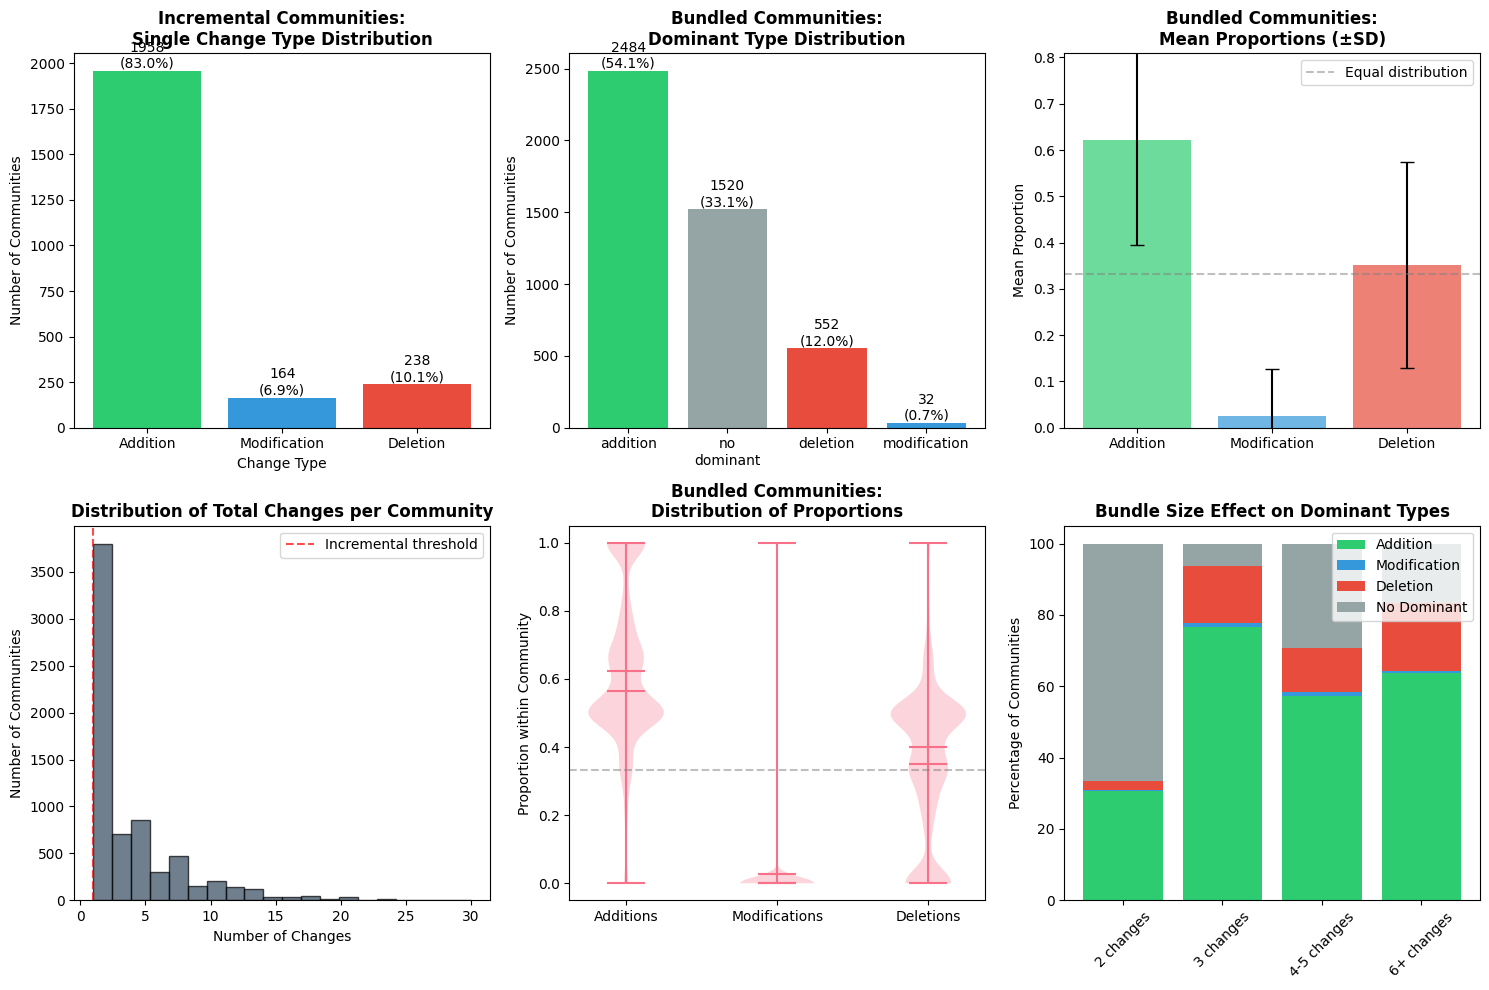

In [29]:
# ============================================================================
# VISUALIZATION
# ============================================================================
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Distribution of change types in incremental communities
ax1 = axes[0, 0]
inc_types = ['Addition', 'Modification', 'Deletion']
inc_counts = [inc_single_addition, inc_single_modification, inc_single_deletion]
bars1 = ax1.bar(inc_types, inc_counts, color=['#2ecc71', '#3498db', '#e74c3c'])
ax1.set_title('Incremental Communities:\nSingle Change Type Distribution', fontweight='bold')
ax1.set_ylabel('Number of Communities')
ax1.set_xlabel('Change Type')
for bar, count in zip(bars1, inc_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{count}\n({count/sum(inc_counts)*100:.1f}%)',
             ha='center', va='bottom')

# 2. Dominant types in bundled communities
ax2 = axes[0, 1]
if len(bundled_communities) > 0:
    dom_counts = bundled_communities['dominant_type'].value_counts()
    colors = {'addition': '#2ecc71', 'modification': '#3498db',
              'deletion': '#e74c3c', 'no_dominant': '#95a5a6'}
    dom_colors = [colors.get(x, '#95a5a6') for x in dom_counts.index]
    bars2 = ax2.bar(range(len(dom_counts)), dom_counts.values, color=dom_colors)
    ax2.set_xticks(range(len(dom_counts)))
    ax2.set_xticklabels([x.replace('_', '\n') for x in dom_counts.index], rotation=0)
    ax2.set_title('Bundled Communities:\nDominant Type Distribution', fontweight='bold')
    ax2.set_ylabel('Number of Communities')
    for bar, count in zip(bars2, dom_counts.values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{count}\n({count/len(bundled_communities)*100:.1f}%)',
                 ha='center', va='bottom')

# 3. Mean proportions comparison
ax3 = axes[0, 2]
if len(bundled_communities) > 0:
    mean_props = [
        bundled_communities['prop_additions'].mean(),
        bundled_communities['prop_modifications'].mean(),
        bundled_communities['prop_deletions'].mean()
    ]
    std_props = [
        bundled_communities['prop_additions'].std(),
        bundled_communities['prop_modifications'].std(),
        bundled_communities['prop_deletions'].std()
    ]
    x_pos = np.arange(len(inc_types))
    bars3 = ax3.bar(x_pos, mean_props, yerr=std_props,
                    color=['#2ecc71', '#3498db', '#e74c3c'],
                    capsize=5, alpha=0.7)
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(inc_types)
    ax3.set_title('Bundled Communities:\nMean Proportions (±SD)', fontweight='bold')
    ax3.set_ylabel('Mean Proportion')
    ax3.set_ylim(0, max(mean_props) * 1.3)
    ax3.axhline(y=0.333, color='gray', linestyle='--', alpha=0.5, label='Equal distribution')
    ax3.legend()

# 4. Distribution of total changes
ax4 = axes[1, 0]
ax4.hist(df_changed['total_changes'], bins=20, color='#34495e', alpha=0.7, edgecolor='black')
ax4.set_title('Distribution of Total Changes per Community', fontweight='bold')
ax4.set_xlabel('Number of Changes')
ax4.set_ylabel('Number of Communities')
ax4.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='Incremental threshold')
ax4.legend()

# 5. Proportion distributions (violin plot)
ax5 = axes[1, 1]
if len(bundled_communities) > 0:
    violin_data = [
        bundled_communities['prop_additions'].dropna(),
        bundled_communities['prop_modifications'].dropna(),
        bundled_communities['prop_deletions'].dropna()
    ]
    parts = ax5.violinplot(violin_data, positions=[1, 2, 3],
                           showmeans=True, showmedians=True)
    ax5.set_xticks([1, 2, 3])
    ax5.set_xticklabels(['Additions', 'Modifications', 'Deletions'])
    ax5.set_title('Bundled Communities:\nDistribution of Proportions', fontweight='bold')
    ax5.set_ylabel('Proportion within Community')
    ax5.axhline(y=0.333, color='gray', linestyle='--', alpha=0.5)

# 6. Bundle size effect on dominant types
ax6 = axes[1, 2]
if len(bundled_communities) > 0:
    size_cats = bundled_communities['bundle_size_cat'].unique()
    size_cats = [cat for cat in ['2 changes', '3 changes', '4-5 changes', '6+ changes']
                 if cat in size_cats]

    # Prepare data for stacked bar chart
    dom_by_size = {}
    for dom_type in ['addition', 'modification', 'deletion', 'no_dominant']:
        dom_by_size[dom_type] = []
        for size_cat in size_cats:
            subset = bundled_communities[bundled_communities['bundle_size_cat'] == size_cat]
            count = (subset['dominant_type'] == dom_type).sum()
            pct = count / len(subset) * 100 if len(subset) > 0 else 0
            dom_by_size[dom_type].append(pct)

    # Create stacked bar chart
    x_pos = np.arange(len(size_cats))
    bottom = np.zeros(len(size_cats))

    colors = {'addition': '#2ecc71', 'modification': '#3498db',
              'deletion': '#e74c3c', 'no_dominant': '#95a5a6'}

    for dom_type in ['addition', 'modification', 'deletion', 'no_dominant']:
        ax6.bar(x_pos, dom_by_size[dom_type], bottom=bottom,
                label=dom_type.replace('_', ' ').title(),
                color=colors[dom_type])
        bottom += dom_by_size[dom_type]

    ax6.set_xticks(x_pos)
    ax6.set_xticklabels(size_cats, rotation=45)
    ax6.set_title('Bundle Size Effect on Dominant Types', fontweight='bold')
    ax6.set_ylabel('Percentage of Communities')
    ax6.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Plotting

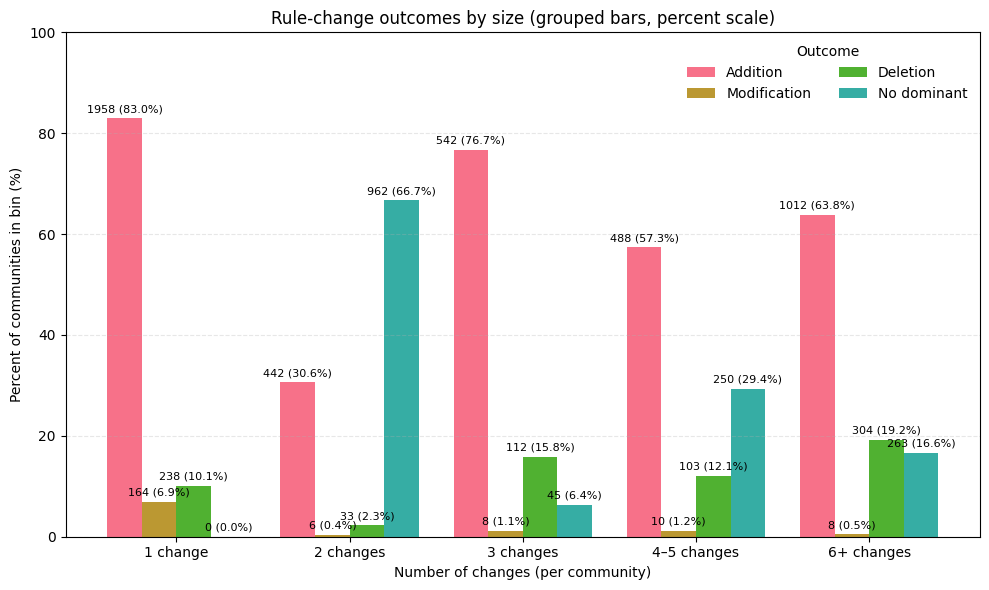

In [37]:
# -*- coding: utf-8 -*-
# Multi-column histogram (grouped bar chart) for rule-change categories by size


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Enter the data (counts)
# -----------------------------
data = {
    "bin": ["1 change", "2 changes", "3 changes", "4–5 changes", "6+ changes"],
    "n":   [2360,       1443,        707,         851,            1587],
    "addition":      [1958, 442, 542, 488, 1012],
    "modification":  [164,    6,   8,  10,    8],
    "deletion":      [238,   33, 112, 103,  304],
    "no_dominant":   [0,    962,  45, 250,  263],  # only present for 2+ changes bins
}

df = pd.DataFrame(data)

# Optional: sanity checks to ensure totals within each bin don't exceed n
df["sum_components"] = df[["addition", "modification", "deletion", "no_dominant"]].sum(axis=1)
if (df["sum_components"] > df["n"]).any():
    raise ValueError("Component counts exceed n in at least one bin. Please verify inputs.")

# -----------------------------
# 2) Compute percentages
# -----------------------------
cats_order = ["addition", "modification", "deletion", "no_dominant"]
pretty_names = {
    "addition": "Addition",
    "modification": "Modification",
    "deletion": "Deletion",
    "no_dominant": "No dominant",
}

# Percent of each category out of bin n (×100)
for c in cats_order:
    df[c + "_pct"] = (df[c] / df["n"]) * 100

# -----------------------------
# 3) Plot: grouped bars (percent scale)
# -----------------------------
plt.figure(figsize=(10, 6))

x = np.arange(len(df))                     # group positions
width = 0.2                                # bar width
offsets = np.linspace(-1.5, 1.5, num=4)    # symmetric offsets for 4 categories

bars = []
for i, c in enumerate(cats_order):
    # Shift each category's bars by an offset
    bar = plt.bar(x + offsets[i]*width, df[c + "_pct"], width, label=f"{pretty_names[c]}")
    bars.append(bar)

# Axes/labels
plt.xticks(x, df["bin"], rotation=0)
plt.ylabel("Percent of communities in bin (%)")
plt.xlabel("Number of changes (per community)")
plt.title("Rule-change outcomes by size (grouped bars, percent scale)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.legend(title="Outcome", ncol=2, frameon=False)

# -----------------------------
# 4) Annotate each bar with count and percent
# -----------------------------
def annotate_bars(bar_container, counts, percents):
    for rect, count, pct in zip(bar_container, counts, percents):
        height = rect.get_height()
        if np.isnan(height):  # just in case
            continue
        # Show "count (pct%)" above the bar
        plt.annotate(f"{int(count)} ({pct:.1f}%)",
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # pixels
                     textcoords="offset points",
                     ha="center", va="bottom", fontsize=8)

for i, c in enumerate(cats_order):
    annotate_bars(
        bars[i],
        df[c].to_list(),
        df[c + "_pct"].to_list()
    )

plt.tight_layout()
plt.show()

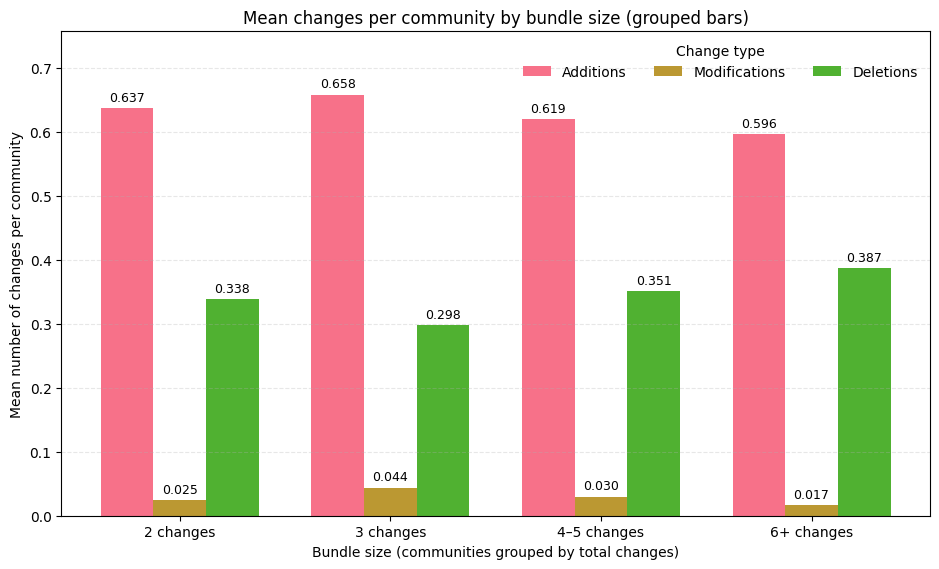

In [33]:
# -*- coding: utf-8 -*-
# Grouped bar chart: mean number of changes per community by bundle-size bin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Enter the data (means)
# -----------------------------
data_mean = {
    "bin": ["2 changes", "3 changes", "4–5 changes", "6+ changes"],
    "n":   [1443,        707,         851,            1587],
    "Additions":     [0.637, 0.658, 0.619, 0.596],
    "Modifications": [0.025, 0.044, 0.030, 0.017],
    "Deletions":     [0.338, 0.298, 0.351, 0.387],
}

dfm = pd.DataFrame(data_mean)

cats_order = ["Additions", "Modifications", "Deletions"]

# -----------------------------
# 2) Plot: grouped bars (mean scale)
# -----------------------------
plt.figure(figsize=(9.5, 5.8))

x = np.arange(len(dfm))          # group positions
width = 0.25                     # bar width
offsets = np.linspace(-1, 1, num=len(cats_order))  # symmetric offsets for 3 cats

bars = []
for i, c in enumerate(cats_order):
    bar = plt.bar(x + offsets[i]*width, dfm[c], width, label=c)
    bars.append(bar)

# Axes/labels
plt.xticks(x, dfm["bin"])
plt.ylabel("Mean number of changes per community")
plt.xlabel("Bundle size (communities grouped by total changes)")
plt.title("Mean changes per community by bundle size (grouped bars)")
ymax = max(dfm[cats_order].to_numpy().max(), 0.01) * 1.15
plt.ylim(0, ymax)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.legend(title="Change type", ncol=3, frameon=False)

# -----------------------------
# 3) Annotate each bar with the mean value
# -----------------------------
def annotate_means(bar_container, values):
    for rect, val in zip(bar_container, values):
        height = rect.get_height()
        plt.annotate(f"{val:.3f}",
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha="center", va="bottom", fontsize=9)

for i, c in enumerate(cats_order):
    annotate_means(bars[i], dfm[c].to_list())

plt.tight_layout()
plt.show()

# -----------------------------
# (Optional) Save figure
# -----------------------------
# plt.savefig("mean_changes_grouped_bars.png", dpi=300, bbox_inches="tight")


# Rule-level Analysis


EVENT COUNTS by category (sum of events):
                      added  changed  deleted  total_events
community_category                                         
single_change        1958.0    164.0    238.0        2360.0
multiple_changes    14747.0    512.0   9320.0       24579.0

PERCENT OF EVENTS within category (added/changed/deleted):
                    added  changed  deleted
community_category                         
single_change        83.0      6.9     10.1
multiple_changes     60.0      2.1     37.9


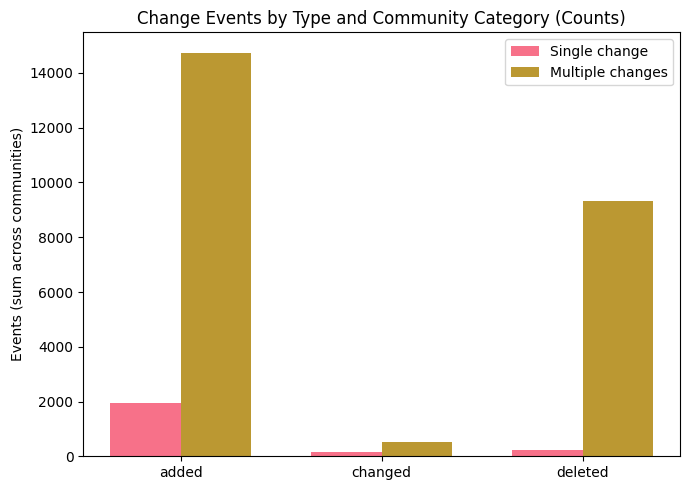

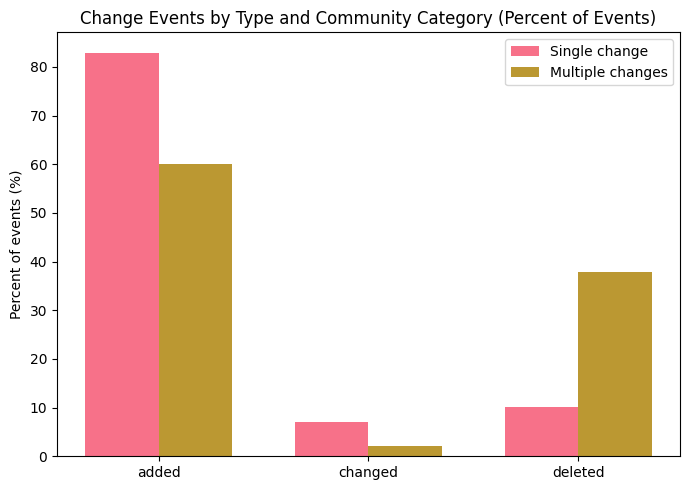


The colors are known as color-blind friendly


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
file_path = '/content/drive/My Drive/Projects/Reddit_rules/2024_ChenEtAl_rulechange/sub_level_data.csv'
df = pd.read_csv(file_path)

# -----------------------------
# Ensure numeric dtypes
# -----------------------------
numeric_cols = [
    'added', 'changed', 'deleted', 'unchanged',
    'subscribers_1', 'subscribers_2', 'rules_1', 'rules_2', 'age_in_months'
]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

# -----------------------------
# Total changes and categories
# -----------------------------
df['total_changes'] = df[['added', 'changed', 'deleted']].sum(axis=1)

# Drop communities with zero changes across added/changed/deleted
df_changes = df[df['total_changes'] > 0].copy()

# Label single vs multiple (based on number of events, not types)
df_changes['community_category'] = np.where(
    df_changes['total_changes'] == 1, 'single_change', 'multiple_changes'
)

# -----------------------------
# Aggregate EVENT COUNTS (not community counts)
# -----------------------------
agg = (
    df_changes
    .groupby('community_category')[['added', 'changed', 'deleted']]
    .sum()
    .reindex(['single_change', 'multiple_changes'])  # keep stable order
)

# Compute total events per category and percentages
agg['total_events'] = agg[['added', 'changed', 'deleted']].sum(axis=1)
pct = agg[['added', 'changed', 'deleted']].div(agg['total_events'], axis=0) * 100

# Tidy tables for display/printing
counts_long = (
    agg[['added', 'changed', 'deleted']]
      .reset_index()
      .melt(id_vars='community_category', var_name='change_type', value_name='events')
)

pct_long = (
    pct[['added', 'changed', 'deleted']]
      .reset_index()
      .melt(id_vars='community_category', var_name='change_type', value_name='pct_of_events')
)

print("\nEVENT COUNTS by category (sum of events):")
print(agg[['added', 'changed', 'deleted', 'total_events']])

print("\nPERCENT OF EVENTS within category (added/changed/deleted):")
print(pct.round(1))

# -----------------------------
# Plots (counts and percentages)
# -----------------------------
types = ['added', 'changed', 'deleted']
x = np.arange(len(types))
width = 0.35

# Plot 1: Event counts per type (by category)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.bar(x - width/2, agg.loc['single_change', types].values, width, label='Single change')
ax1.bar(x + width/2, agg.loc['multiple_changes', types].values, width, label='Multiple changes')
ax1.set_xticks(x)
ax1.set_xticklabels(types)
ax1.set_ylabel('Events (sum across communities)')
ax1.set_title('Change Events by Type and Community Category (Counts)')
ax1.legend()
plt.tight_layout()
plt.show()

# Plot 2: Percent of events within category
fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.bar(x - width/2, pct.loc['single_change', types].values, width, label='Single change')
ax2.bar(x + width/2, pct.loc['multiple_changes', types].values, width, label='Multiple changes')
ax2.set_xticks(x)
ax2.set_xticklabels(types)
ax2.set_ylabel('Percent of events (%)')
ax2.set_title('Change Events by Type and Community Category (Percent of Events)')
ax2.legend()
plt.tight_layout()
plt.show()

print("\nThe colors are known as color-blind friendly")

# Hypothesis Tests

## Single Change

## Bundle Changes (Community-level)